# 0.) Import and Clean data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [20]:
df = pd.read_csv('bank-additional-full (1).csv',sep=';')

In [21]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
df = df.drop(["default", "pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [24]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [25]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

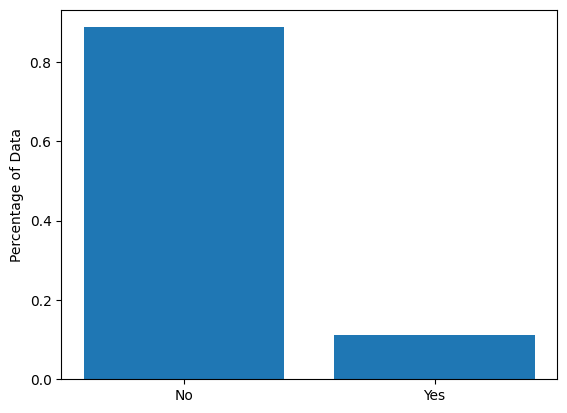

In [26]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [27]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [30]:
dtree_og = DecisionTreeClassifier(max_depth = 3)
dtree_og.fit(smote_X, smote_y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.176\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.491\ngini = 0.291\nsamples = 19664\nvalue = [16183, 3481]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.11\nsamples = 10579\nvalue = [9959, 620]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.092\nsamples = 10370\nvalue = [9868.0, 502.0]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.492\nsamples = 209\nvalue = [91.0, 118.0]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.319\ngini = 0.431\nsamples = 9085\nvalue = [6224, 2861]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.487\nsamples = 6621\nvalue = [3837.0, 2784.0]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.061\nsamples = 2464\nvalue = [2387, 77]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.419\nsamples = 31496\nvalue = [9397, 22099]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.681\ngini = 0.339\nsamples = 25852\nvalue = [5587, 202

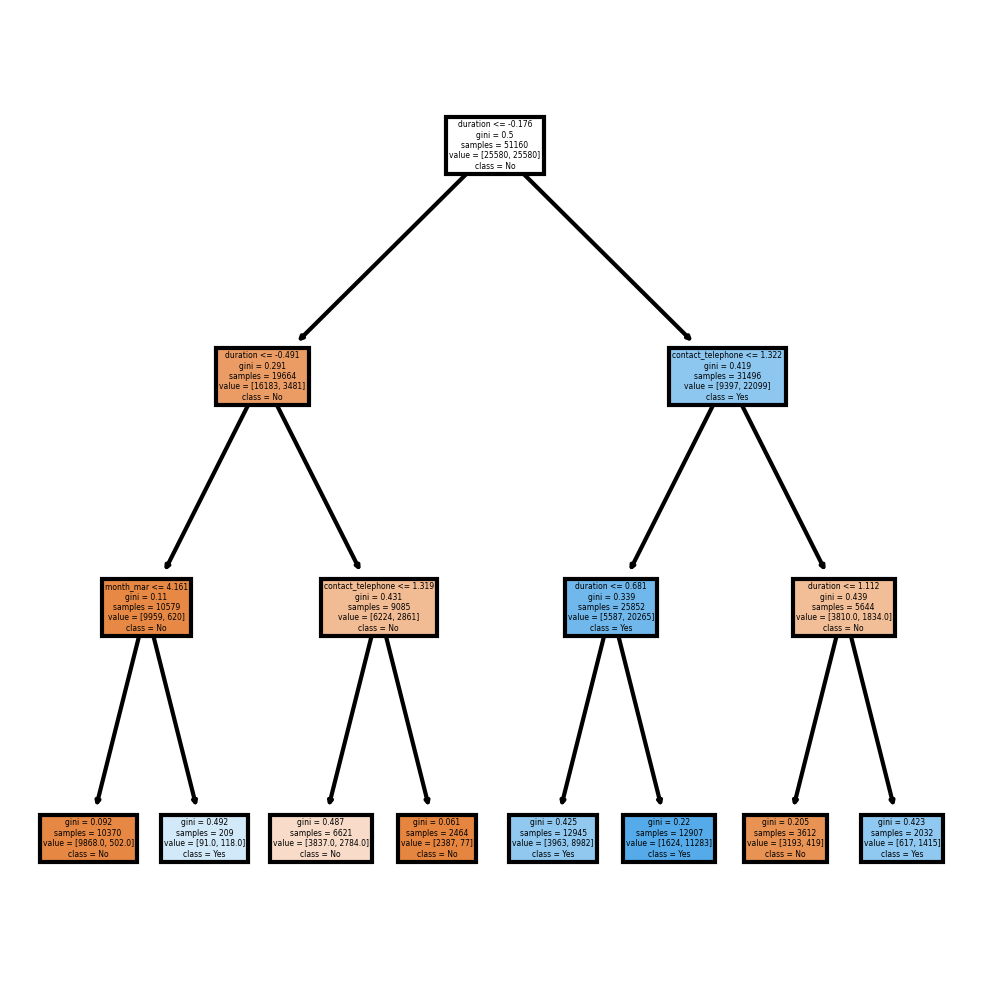

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_og, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [34]:
y_pred = dtree_og.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

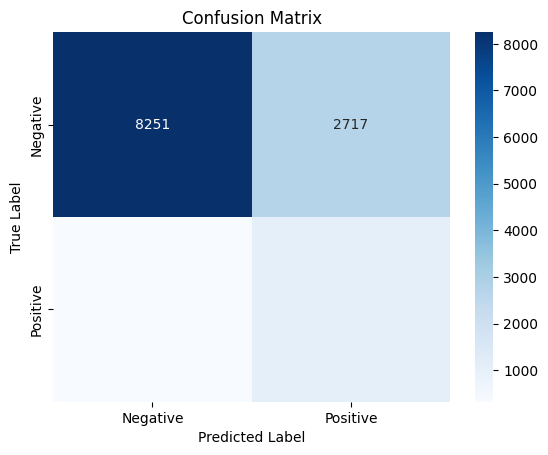

In [35]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [36]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [37]:
bagging = BaggingClassifier(estimator = dtree, n_estimators = 100, max_samples = 0.5, max_features = 1.)

In [38]:
bagging.fit(smote_X, smote_y)
y_pred = bagging.predict(X_test)

C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

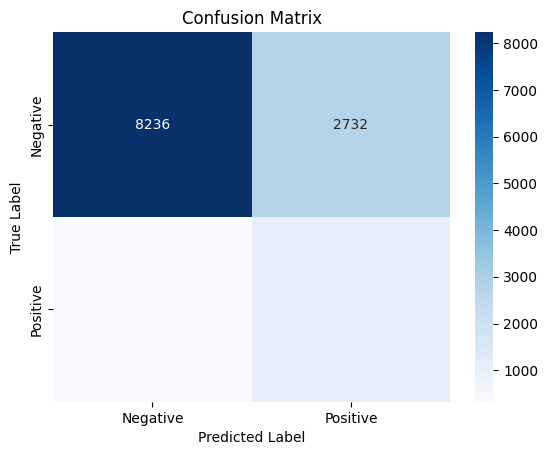

In [40]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
ada_boost = AdaBoostClassifier(estimator = dtree, n_estimators = 100, learning_rate = 0.1)

In [43]:
ada_boost.fit(smote_X, smote_y)
y_pred = ada_boost.predict(X_test)

C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [44]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

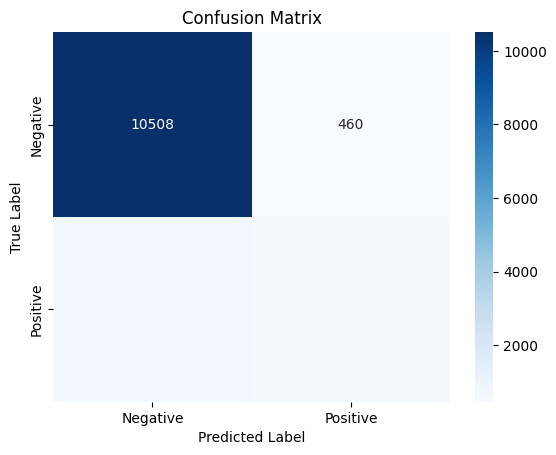

In [45]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [46]:
pip install mlens

     ---------------------------------------- 0.0/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/227.7 kB ? eta -:--:--
     ----- ----------------------------

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [49]:
base_predictions = [list(dtree_og.predict(smote_X).astype(float)), list(bagging.predict(smote_X).astype(float)), list(ada_boost.predict(smote_X).astype(float))]
base_predictions_transpose = np.array(base_predictions).transpose()
base_predictions_transpose

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [50]:
super_learner = LogisticRegression()

In [51]:
super_learner.fit(base_predictions_transpose, smote_y)
super_learner.coef_

C:\Users\akudu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.47836402, 0.8598725 , 5.04081663]])